In [5]:
import pandas as pd

In [6]:
# Load dataset
df = pd.read_csv('../data/cardio_train.csv', sep=';')

In [7]:
# Show basic info
df.shape, df.columns

((70000, 13),
 Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
        'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
       dtype='object'))

In [8]:
# Display the first 5 rows
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [9]:
# Data types of each column
df.dtypes


id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [10]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


In [11]:
# Check for missing/null values
df.isnull().sum()


id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [12]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")


Number of duplicate rows: 0


In [13]:
# Drop exact duplicates
df.drop_duplicates(inplace=True)

# Confirm new shape
df.shape


(70000, 13)

In [14]:
# Drop the 'id' column
df.drop(columns='id', inplace=True)

# Confirm it's dropped
df.columns


Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

OUTLIERS

In [15]:
df['age_years'] = (df['age'] / 365.25).astype(int)


In [16]:
df['age_years'].describe()


count    70000.000000
mean        52.803257
std          6.762462
min         29.000000
25%         48.000000
50%         53.000000
75%         58.000000
max         64.000000
Name: age_years, dtype: float64

In [17]:
df.rename(columns={'age_years': 'Chronological_Age'}, inplace=True)


In [18]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Chronological_Age
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47


In [19]:
df.drop(columns='age', inplace=True)


In [20]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Chronological_Age
0,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,156,85.0,140,90,3,1,0,0,1,1,55
2,1,165,64.0,130,70,3,1,0,0,0,1,51
3,2,169,82.0,150,100,1,1,0,0,1,1,48
4,1,156,56.0,100,60,1,1,0,0,0,0,47


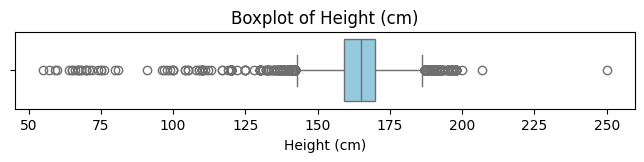

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 1))
sns.boxplot(x=df['height'], color='skyblue')
plt.title("Boxplot of Height (cm)")
plt.xlabel("Height (cm)")
plt.show()


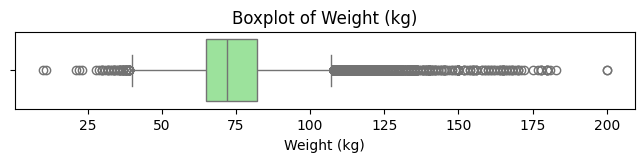

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 1))
sns.boxplot(x=df['weight'], color='lightgreen')
plt.title("Boxplot of Weight (kg)")
plt.xlabel("Weight (kg)")
plt.show()


In [23]:
df['gender'].unique()
df['gender'].value_counts()



gender
1    45530
2    24470
Name: count, dtype: int64

In [24]:
# Drop rows where systolic BP (ap_hi) is less than 80 or greater than 250
df = df[(df['ap_hi'] >= 80) & (df['ap_hi'] <= 250)]


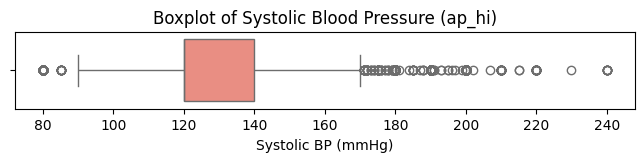

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 1))
sns.boxplot(x=df['ap_hi'], color='salmon')
plt.title("Boxplot of Systolic Blood Pressure (ap_hi)")
plt.xlabel("Systolic BP (mmHg)")
plt.show()



In [26]:
# Keep only rows with valid diastolic BP values
df = df[(df['ap_lo'] >= 50) & (df['ap_lo'] <= 150)]


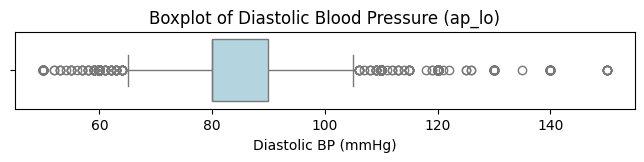

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 1))
sns.boxplot(x=df['ap_lo'], color='lightblue')
plt.title("Boxplot of Diastolic Blood Pressure (ap_lo)")
plt.xlabel("Diastolic BP (mmHg)")
plt.show()


In [28]:
df['cholesterol'].unique()
df['cholesterol'].value_counts()


cholesterol
1    51537
2     9305
3     7879
Name: count, dtype: int64

In [29]:
df['gluc'].unique()
df['gluc'].value_counts()



gluc
1    58429
3     5226
2     5066
Name: count, dtype: int64

In [30]:
df['smoke'].unique()
df['smoke'].value_counts()


smoke
0    62672
1     6049
Name: count, dtype: int64

In [31]:
df['alco'].unique()
df['alco'].value_counts()


alco
0    65043
1     3678
Name: count, dtype: int64

In [32]:
df['active'].unique()
df['active'].value_counts()


active
1    55211
0    13510
Name: count, dtype: int64

In [33]:
df['cardio'].unique()
df['cardio'].value_counts()


cardio
0    34713
1    34008
Name: count, dtype: int64

FEATURE ENGINEERING

In [34]:
df['BMI'] = df['weight'] / ((df['height'] / 100) ** 2)


In [35]:
df['Pulse_Pressure'] = df['ap_hi'] - df['ap_lo']


In [36]:
df['MAP'] = (df['ap_hi'] + 2 * df['ap_lo']) / 3


In [37]:
df['SBP_DBP_Ratio'] = df['ap_hi'] / df['ap_lo']


In [38]:
df['Obesity_Class'] = pd.cut(df['BMI'], 
                             bins=[0, 18.5, 24.9, 29.9, 34.9, 100],
                             labels=['Underweight', 'Normal', 'Overweight', 'Obese', 'Severely Obese'])


In [39]:
df['Lifestyle_Risk'] = df['smoke'] + df['alco'] + (1 - df['active'])


In [40]:
df.columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'cardio', 'Chronological_Age', 'BMI',
       'Pulse_Pressure', 'MAP', 'SBP_DBP_Ratio', 'Obesity_Class',
       'Lifestyle_Risk'],
      dtype='object')

In [41]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Chronological_Age,BMI,Pulse_Pressure,MAP,SBP_DBP_Ratio,Obesity_Class,Lifestyle_Risk
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,30,90.000000,1.375000,Normal,0
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,50,106.666667,1.555556,Severely Obese,0
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,60,90.000000,1.857143,Normal,1
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,50,116.666667,1.500000,Overweight,0
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,40,73.333333,1.666667,Normal,1


In [42]:
features_to_scale = ['height', 'weight', 'ap_hi', 'ap_lo', 'BMI', 'MAP', 'Pulse_Pressure', 'SBP_DBP_Ratio']


In [43]:
from sklearn.preprocessing import StandardScaler

# Copy of your main DataFrame
df_scaled = df.copy()

# Define features to scale
features_to_scale = ['height', 'weight', 'ap_hi', 'ap_lo', 'BMI', 'MAP', 'Pulse_Pressure', 'SBP_DBP_Ratio']

# Initialize scaler and fit-transform
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df_scaled[features_to_scale])

# Add scaled columns with suffix
for i, col in enumerate(features_to_scale):
    df_scaled[f"{col}_scaled"] = scaled_array[:, i]


In [44]:
df_scaled.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,...,Obesity_Class,Lifestyle_Risk,height_scaled,weight_scaled,ap_hi_scaled,ap_lo_scaled,BMI_scaled,MAP_scaled,Pulse_Pressure_scaled,SBP_DBP_Ratio_scaled
0,2,168,62.0,110,80,1,1,0,0,1,...,Normal,0,0.444260,-0.846040,-0.994279,-0.143159,-0.918170,-0.584720,-1.272755,-1.241263
1,1,156,85.0,140,90,3,1,0,0,1,...,Severely Obese,0,-1.021866,0.758864,0.799712,0.906792,1.223691,0.925888,0.394973,-0.035083
2,1,165,64.0,130,70,3,1,0,0,0,...,Normal,1,0.077729,-0.706483,0.201715,-1.193111,-0.663556,-0.584720,1.228837,1.979636
3,2,169,82.0,150,100,1,1,0,0,1,...,Overweight,0,0.566437,0.549529,1.397709,1.956743,0.196237,1.832253,0.394973,-0.406215
4,1,156,56.0,100,60,1,1,0,0,0,...,Normal,1,-1.021866,-1.264711,-1.592276,-2.243062,-0.745629,-2.095328,-0.438891,0.707182


In [45]:
df_scaled['Obesity_Class_Encoded'] = df['Obesity_Class'].astype('category').cat.codes


In [46]:
df_scaled.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,...,Lifestyle_Risk,height_scaled,weight_scaled,ap_hi_scaled,ap_lo_scaled,BMI_scaled,MAP_scaled,Pulse_Pressure_scaled,SBP_DBP_Ratio_scaled,Obesity_Class_Encoded
0,2,168,62.0,110,80,1,1,0,0,1,...,0,0.444260,-0.846040,-0.994279,-0.143159,-0.918170,-0.584720,-1.272755,-1.241263,1
1,1,156,85.0,140,90,3,1,0,0,1,...,0,-1.021866,0.758864,0.799712,0.906792,1.223691,0.925888,0.394973,-0.035083,4
2,1,165,64.0,130,70,3,1,0,0,0,...,1,0.077729,-0.706483,0.201715,-1.193111,-0.663556,-0.584720,1.228837,1.979636,1
3,2,169,82.0,150,100,1,1,0,0,1,...,0,0.566437,0.549529,1.397709,1.956743,0.196237,1.832253,0.394973,-0.406215,2
4,1,156,56.0,100,60,1,1,0,0,0,...,1,-1.021866,-1.264711,-1.592276,-2.243062,-0.745629,-2.095328,-0.438891,0.707182,1


In [48]:
df_scaled.to_pickle('../data/final_preprocessed_dataset.pkl')
